# Delayed tasks analysis


### Convert notebook to python
```
bash
jupyter nbconvert "D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20221201_073500_reaching_go_spout_bar_nov22.ipynb" --to="python" --output-dir="D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical" --output="nb20221201_073500_reaching_go_spout_bar_nov22"
```

Quick analysis of instrumental reaching

In [23]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Variables

In [24]:
import pandas as pd
from pathlib import Path, WindowsPath

trial_window = [-4000, 8000] # in ms

# time limit around trigger to perform an event
# determine successful trials
timelim = [1000, 4000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder = Path(os.getcwd()).parent.parent

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = Path(basefolder,'params','tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

# from sample_data

# # From jade
# photometry_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/photometry')
# pycontrol_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pycontrol')

# # From julien-pc
# photometry_dir = Path('\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\photometry')
# pycontrol_dir = Path('\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\pycontrol')

# From laptop
photometry_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pyphotometry'
pycontrol_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol'

video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'
tasks = pd.read_csv(tasksfile, usecols=[1, 2, 3, 4], index_col=False)


### Create an experiment object


In [25]:
# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(path=pycontrol_dir, int_subject_IDs=True, update=True, verbose=False)

Saved sessions loaded from: sessions.pkl


In [26]:
# exp_cohort = Experiment(path=r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\JC317L-2022-12-16-174417.txt', int_subject_IDs=True, update=True, verbose=False)


In [27]:
[print(session.task_name, session.subject_ID, session.datetime) for session in exp_cohort.sessions]
print(len(exp_cohort.sessions ))

reaching_go_spout_bar_dual_dec22 318 2022-12-07 18:40:14
reaching_go_spout_bar_dual_dec22 316 2022-12-08 12:55:51
reaching_go_spout_bar_dual_dec22 317 2022-12-08 12:55:51
reaching_go_spout_bar_dual_dec22 316 2022-12-08 14:26:30
reaching_go_spout_bar_dual_dec22 317 2022-12-08 14:26:30
reaching_go_spout_bar_dual_dec22 318 2022-12-08 14:29:10
reaching_go_spout_bar_dual_dec22 316 2022-12-08 14:30:46
reaching_go_spout_bar_dual_dec22 317 2022-12-08 14:30:46
reaching_go_spout_bar_dual_all_reward_dec22 316 2022-12-09 17:19:25
reaching_go_spout_bar_dual_all_reward_dec22 317 2022-12-09 17:19:26
reaching_go_spout_bar_dual_all_reward_dec22 318 2022-12-09 17:21:40
reaching_go_spout_bar_dual_all_reward_dec22 316 2022-12-11 20:26:00
reaching_go_spout_bar_dual_all_reward_dec22 317 2022-12-11 20:26:00
reaching_go_spout_bar_dual_all_reward_dec22 318 2022-12-11 20:30:55
reaching_go_spout_bar_dual_all_reward_dec22 316 2022-12-11 21:26:23
reaching_go_spout_bar_dual_all_reward_dec22 317 2022-12-11 21:26:23


### Perform extraction of behavioural information by trial

In [28]:
# Process the whole experimental folder by trials


exp_cohort.process_exp_by_trial(trial_window, timelim, tasksfile, verbose=True)

# Save the file as sessions.pkl in folder_path
exp_cohort.save()

processing by trial: JC318L-2022-12-07-184014.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC316L-2022-12-08-125551.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC317L-2022-12-08-125551.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC316L-2022-12-08-142630.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC317L-2022-12-08-142630.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC318L-2022-12-08-142910.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC316L-2022-12-08-143046.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC317L-2022-12-08-143046.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC316L-2022-12-09-171925.txt task: reaching_go_spout_bar_dual_all_reward_dec22
processing by trial: JC317L-2022-12-09-171926.txt task: reaching_go_spout_bar_dual_all_reward_dec22
processing by trial: JC318L-2022-12-09-172140.txt task: reaching_go_spout_bar_dual_all_r

### Conditions for delayed go

In [29]:
# Defime each trial type as a dictionary of conditions to be met
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'hold_for_water', 'valid': True, 'hold_timer': True, 
    'water by bar_off': False, 'water for free': False} 
conditions_dict2 = {'trigger': 'hold_for_water', 'valid': True, 'hold_timer': False} #, 'button_press': False}

# conditions_dict2 = {'trigger': 'hold_for_water', 'spout':False, 'valid': True, 'busy_win_timer': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict1, conditions_dict2]
# Aliases for conditions
cond_aliases = ['Go - hold', 'Go - aborted']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None

# Window to exctract (in ms)


In [30]:
ev_dataset = exp_cohort.behav_events_to_dataset(
        groups = groups,
        conditions_list = condition_list, 
        cond_aliases = cond_aliases, 
        when =['2022-11-08',...,'2022-12-25'], 
        task_names = ['reaching_go_spout_nov22','reaching_go_spout_bar_nov22', 'reaching_go_spout_bar_dual_dec22' ,'reaching_go_spout_bar_dual_all_reward_dec22'], #'pavlovian_nobar_nodelay', #'reaching_go_nogo',
        trig_on_ev = None)

ev_dataset.set_trial_window(trial_window=trial_window, unit='milliseconds')
ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)

In [31]:
ev_dataset.metadata_df

,trial_nb,trigger,success,valid,water_on,water by bar_off,water by spout,water for free,water success,button_press,...,condition_ID,condition,group_ID,datetime,date,session_nb,subject_ID,error_trial,keep,trial_ID
0,3,hold_for_water,False,True,False,False,False,False,False,False,...,0,Go - hold,0,2022-12-08 12:55:51,2022-12-08,1,316,NaN,True,0
1,4,hold_for_water,False,True,False,False,False,False,False,False,...,0,Go - hold,0,2022-12-08 12:55:51,2022-12-08,1,316,NaN,True,1
2,5,hold_for_water,False,True,False,False,False,False,False,True,...,0,Go - hold,0,2022-12-08 12:55:51,2022-12-08,1,316,NaN,True,2
3,7,hold_for_water,False,True,False,False,False,False,False,False,...,0,Go - hold,0,2022-12-08 12:55:51,2022-12-08,1,316,NaN,True,3
4,8,hold_for_water,False,True,False,False,False,False,False,False,...,0,Go - hold,0,2022-12-08 12:55:51,2022-12-08,1,316,NaN,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,144,hold_for_water,False,True,False,False,False,False,False,False,...,1,Go - aborted,0,2022-12-15 18:50:51,2022-12-15,13,318,False,True,2774
2775,151,hold_for_water,False,True,False,False,False,False,False,False,...,1,Go - aborted,0,2022-12-15 18:50:51,2022-12-15,13,318,False,True,2775
2776,155,hold_for_water,False,True,False,False,False,False,False,False,...,1,Go - aborted,0,2022-12-15 18:50:51,2022-12-15,13,318,False,True,2776
2777,179,hold_for_water,False,True,False,False,False,False,False,False,...,1,Go - aborted,0,2022-12-15 18:50:51,2022-12-15,13,318,False,True,2777


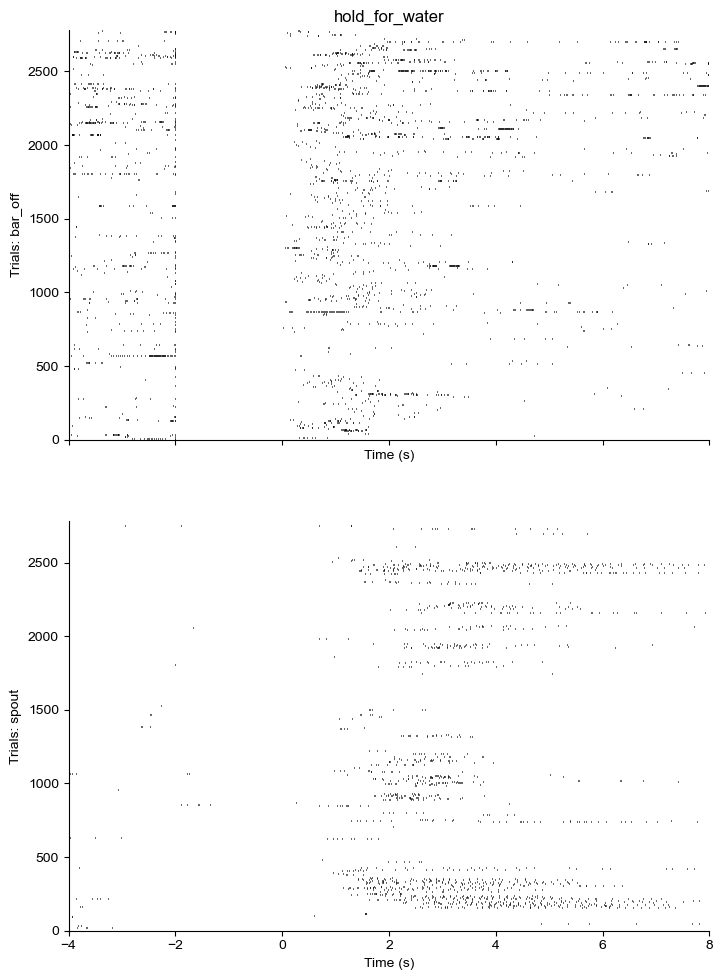

In [32]:
tf = (ev_dataset.get_tfkeep_subjects([316,317,318])) & (ev_dataset.get_tfkeep_dates(date(2022,12,16)))
tf = (ev_dataset.get_tfkeep_subjects([316,317,318]))
ev_dataset.set_keep(tf)

ev_dataset.plot_raster(keys=['bar_off_trial_time','spout_trial_time'])


Behaviour: Compute distribution

In [57]:
dist_as_continuous = ev_dataset.compute_distribution(
        trial_window = [-1999, 10000],
        bin_size = 100, # do not work as expected with cued-uncued
        normalize = True,
        per_session = True,
        out_as_continuous = True)
dist_as_continuous.set_conditions(conditions=condition_list, aliases=cond_aliases)
# Remove test files
# dist_as_continuous.filterout_subjects([0])

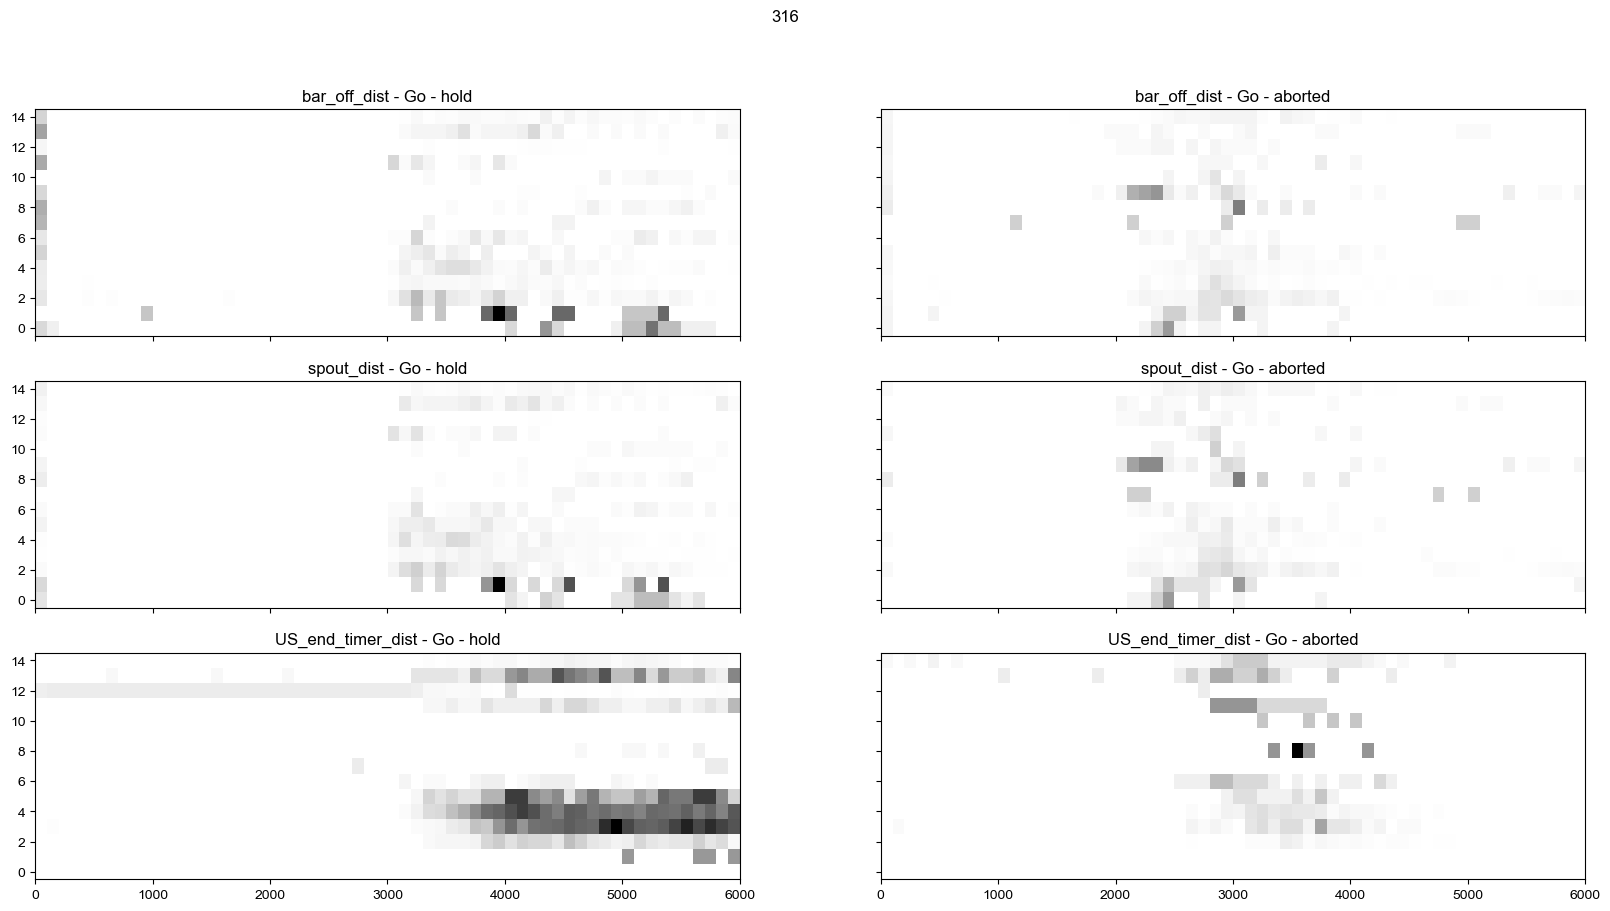

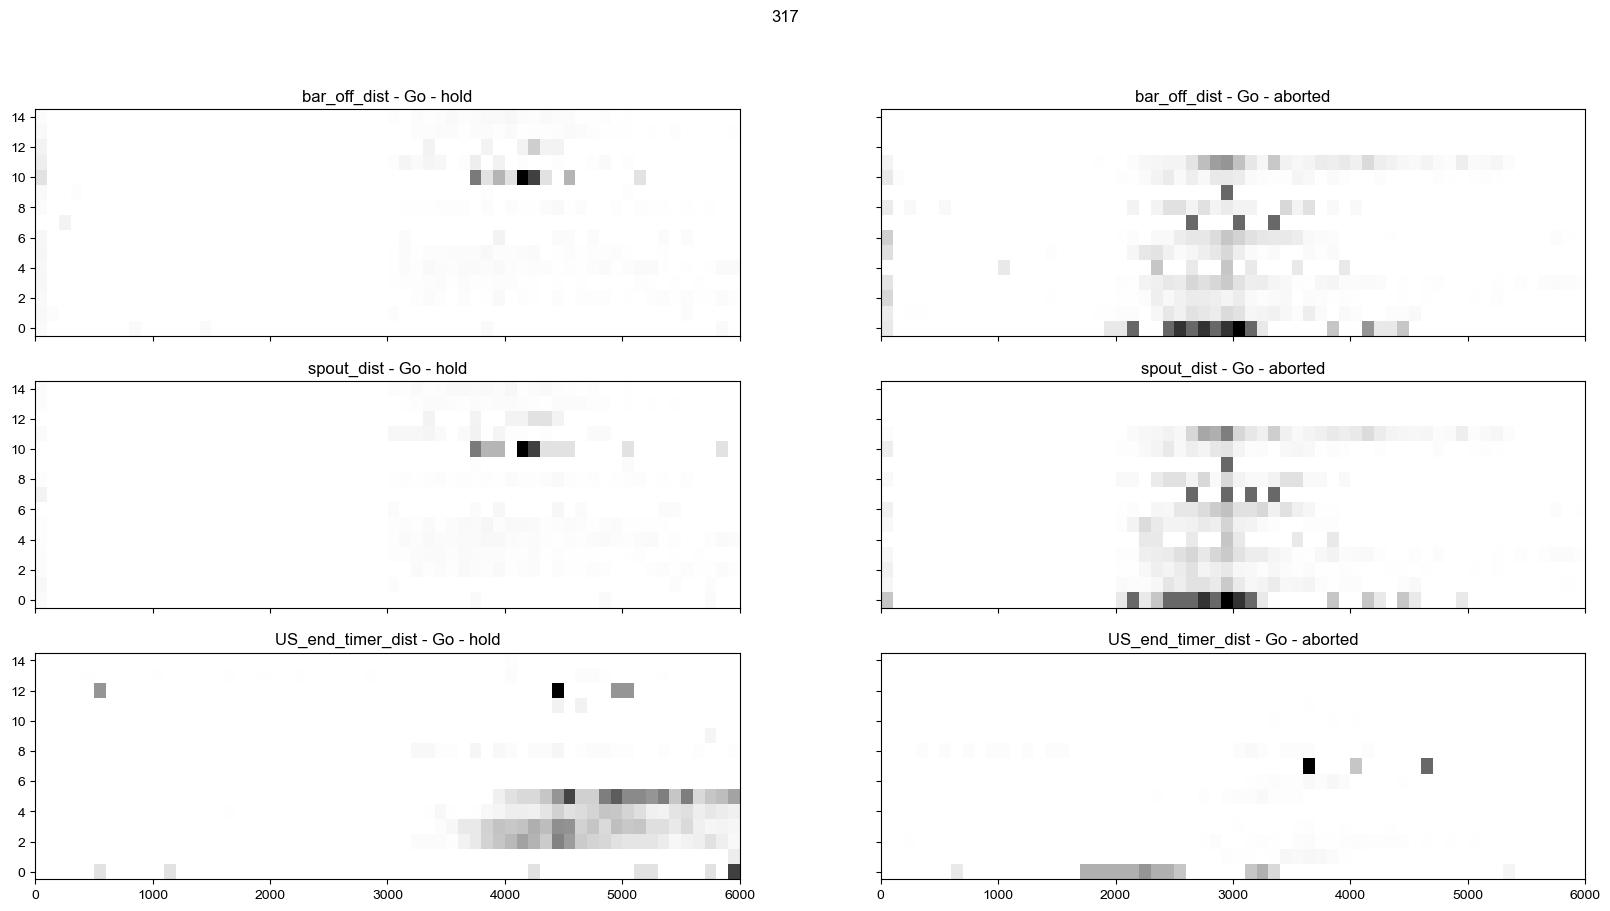

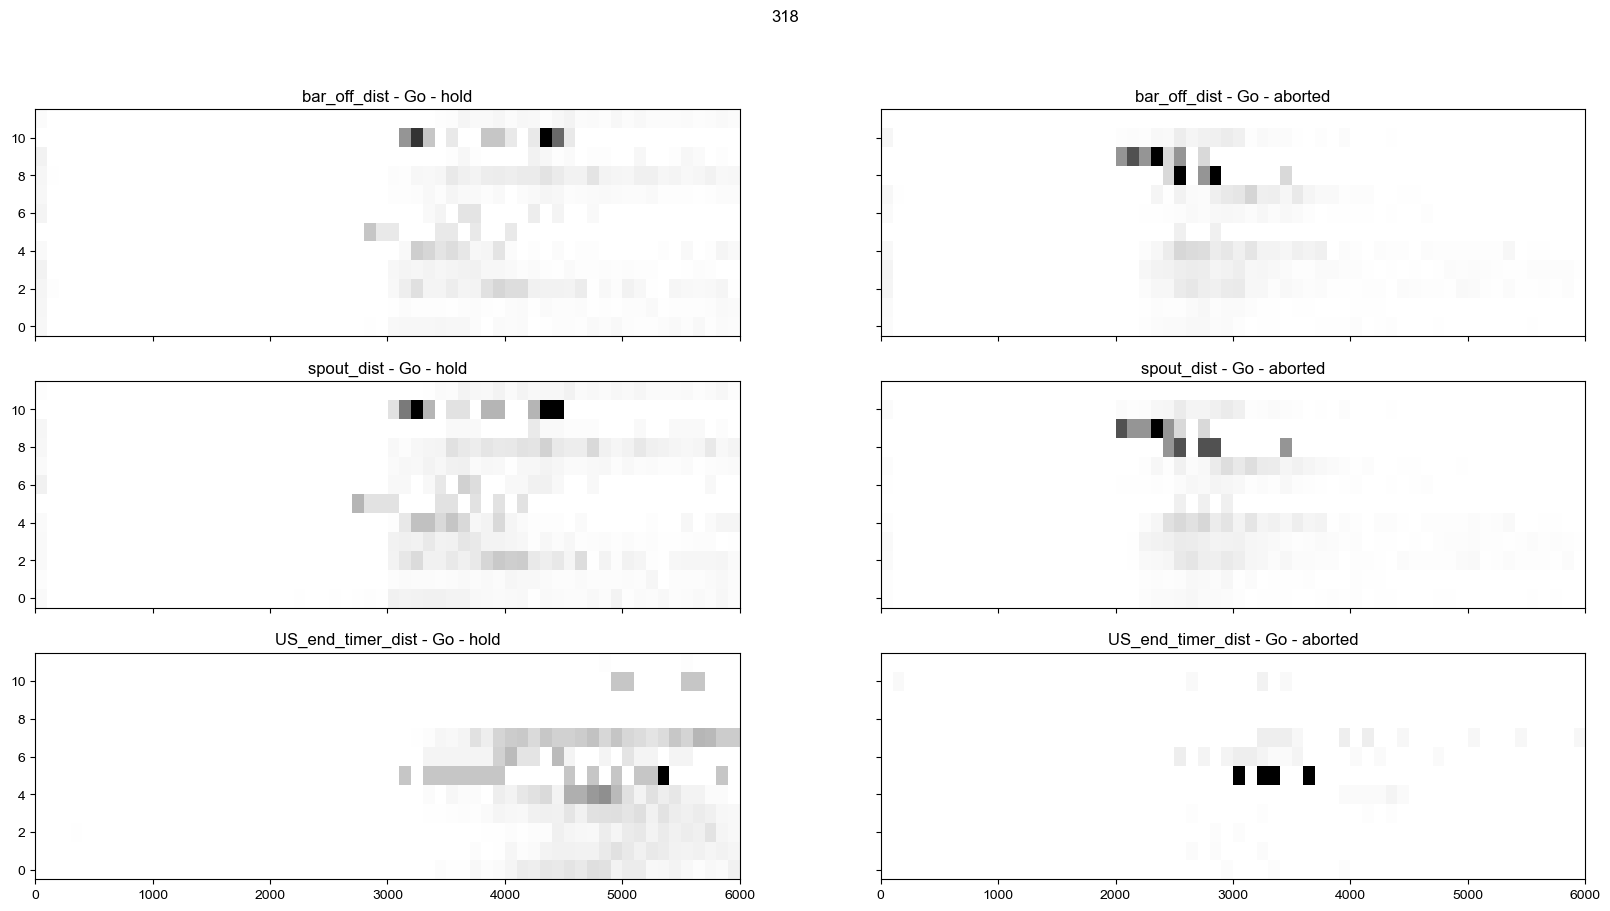

In [89]:
dist_as_continuous.heatmap(
    vars = ['bar_off_dist', 'spout_dist', 'US_end_timer_dist'],
    time_lim = [0, 6000 ],
    colormap = 'Greys'
)

In [19]:
gby

for subject, subject_idx in subj_dict.items():
    print(subject)

316
317
318


In [49]:
dist_as_continuous..shape

(80, 4, 600)

### Optional methods

- Implementation of these optional filtering options is first understood as removing subjects, groups, conditions...
- It is a non-permanent way of discarding elements for analysis
- It is based on a "keep" column in the metadata that is True by default and set to False with the filtering function.
- At anytime, <trial_dataset>.filter_reset() can be called to re-include all the elements in the analysis (set all "keep" to True)
- Comment or uncomment lines and fill the lists according to your needs

In [52]:
# Get a list of the groups
dist_as_continuous.get_groups()
# Get a list of the variables
dist_as_continuous.get_col_names()

# reset previous filtering of the dataset
dist_as_continuous.filter_reset()

# exclude some conditions by IDs
# dist_as_continuous.filter_out_conditions([])

# # exclude some groups by IDs
# dist_as_continuous.filter_out_groups([])

# exclude some subjects
dist_as_continuous.filterout_subjects([313,314,315])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])

# dist_as_continuous.filterout_dates([])

# filter subjects/sessions with less than x trials (by condition)
# dist_as_continuous.filter_min(min_trials = 1)

# To remove subjects who do not have trials
# in all the conditions, if called after filter_min(),
# will discard any subject who do not have the minimum number
# of trials in all the conditions

# dist_as_continuous.filter_if_not_in_all_cond()


Behaviour: Plot distribution

True    80
Name: keep, dtype: int64

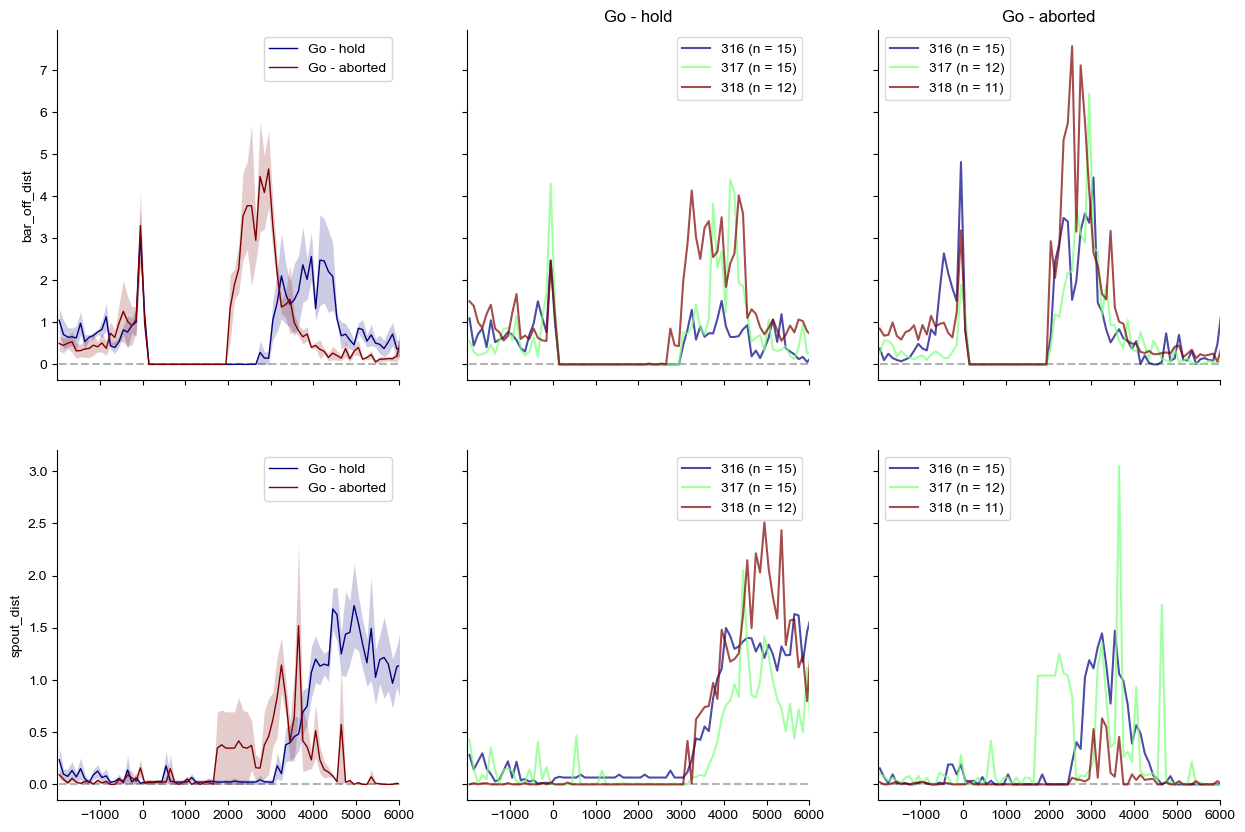

In [53]:
dist_as_continuous.lineplot(
    vars = [ 'bar_off_dist','spout_dist'],
    time_lim = [-1999,6000],
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (15,10),
    dpi = 100,
    verbose = False)
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()

## Match and synchronize photometry to behaviour

In [54]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)
exp_cohort.save()


c:\users\phar0732\documents\github\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
c:\users\phar0732\documents\github\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)


saved C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\sessions.pkl


In [55]:
exp_cohort.match_sessions_to_files(video_dir, ext='mp4')
exp_cohort.match_sessions_to_files(video_dir, ext='h5')

In [ ]:
matching_files = match_sessions_to_files(exp_cohort, video_dir, ext='h5')

In [ ]:
exp_cohort.save('20230128_sample_delayed_sessions')

saved C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\20230128_sample_delayed_sessions.pkl


In [ ]:
vid_to_run_delayed = exp_cohort.list_vids_to_run_in_dlc()


AttributeError: module 'pandas' has no attribute 'to_csv'

### Extract Photometry trials and create a Continuous_Dataset

In [ ]:
trial_window = [-3000, 5000]

cont_dataset = exp_cohort.get_photometry_groups(
        groups = None, # or use groups variable defined above
        conditions_list = condition_list, 
        cond_aliases = cond_aliases,
        trial_window = trial_window,
        when = 'all', 
        task_names = ['reaching_go_spout_nov22','reaching_go_spout_bar_nov22', 'reaching_go_spout_bar_dual_dec22' ,'reaching_go_spout_bar_dual_all_reward_dec22'],
        trig_on_ev = None, # align to the first event of a kind e.g. bar_off
        high_pass = None, 
        low_pass = 45, 
        median_filt = 3,
        motion_corr = True, 
        df_over_f = True, 
        downsampling_factor = 10, 
        export_vars = ['analog_1','analog_1_filt','analog_2','analog_2_filt','analog_1_df_over_f'], 
        remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
        verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True



Processing subject 316 at: 2022-12-08 12:55:51
condition 0 trials: 6
condition 1 trials: 3
Processing subject 316 at: 2022-12-08 14:26:30
condition 0 trials: 3
condition 1 trials: 1
Processing subject 316 at: 2022-12-08 14:30:46
condition 0 trials: 57
condition 1 trials: 72
Processing subject 316 at: 2022-12-17 11:10:37
condition 0 trials: 34
condition 1 trials: 4
Processing subject 316 at: 2022-12-19 09:42:41
condition 0 trials: 19
condition 1 trials: 7
Processing subject 316 at: 2022-12-19 11:15:41
condition 0 trials: 75
condition 1 trials: 19
Processing subject 317 at: 2022-12-15 14:55:30
condition 0 trials: 0
condition 1 trials: 0
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
Processing subject 317 at: 2022-12-15 15:00:40
condition 0 trials: 21
condition 1 trials: 39
Processing subject 317 at: 2022-12-15 16:02:18
condition 0 trials: 11
condition 1 trials: 1
Processing subject 317 at: 2022-12-16 17:31:45
condition 0 trials: 7
condition 1 trials: 12
Processing sub

### Save photometry dataset

In [ ]:
output_folder = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\outputs'

cont_dataset.save(output_folder, 'photo_delayed_reaching_mf3_lp45_bar_off')

NameError: name 'cont_dataset' is not defined

### Reload a pre-existing dataset

In [ ]:
dataset_full_path = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\outputs\photo_delayed_reaching_mf3_lp45_CS.pkl'
cont_dataset = load_dataset(dataset_full_path)

### Optional methods

In [ ]:
# Get a list of the groups
cont_dataset.get_groups()
# Get a list of the variables
cont_dataset.get_col_names()

# reset previous filtering of the dataset
cont_dataset.filter_reset()

# exclude some conditions by IDs
cont_dataset.filterout_conditions([])

# exclude some groups by IDs
cont_dataset.filterout_groups([])

# exclude some subjects
cont_dataset.filterout_subjects([0,1,313,314,317,318])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])

# filter subjects/sessions with less than x trials (by condition)
# cont_dataset.filter_min(min_trials = 7)

# Keep only last n sessions
# cont_dataset.filter_lastNsessions(n = 5)

# Filter artifacted trials
# cont_dataset.filterout_clusters([-1, 1, 2]) # Good cluster is classically 0

# Exclude sessions by dates
# cont_dataset.filterout_dates(days_to_exclude = )

# To remove subjects who do not have
# trials in all the conditions
# Careful when using on sessions when not all conditions are present, 
# it could exclude a big number of whole sessions
# cont_dataset.filter_if_not_in_all_cond()


### Plot the photometry by condition

cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316


False    662
True     300
Name: keep, dtype: int64

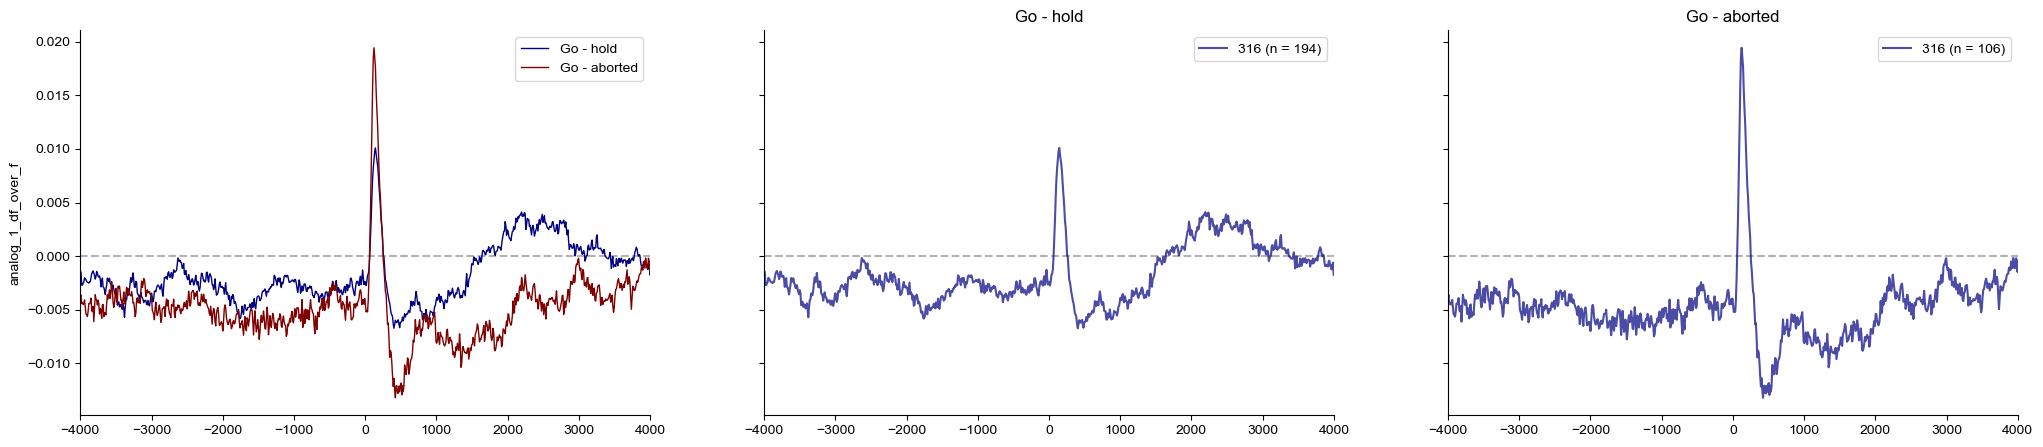

In [ ]:
# Remove this method or make private
# cont_dataset.set_trial_window([-5, 10], 's')

cont_dataset.lineplot(
    vars = ['analog_1_df_over_f'],
    time_lim = [-4000, 4000],
    # time_unit = 'seconds',
    ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    error = True,
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (25, 5),
    dpi = 100,
    verbose = True)

# Return a count of overall number of trials
cont_dataset.metadata_df['keep'].value_counts()



Processing subject 316 at: 2022-12-08 12:55:51
condition 0 trials: 6
condition 1 trials: 3
Processing subject 316 at: 2022-12-08 14:26:30
condition 0 trials: 3
condition 1 trials: 1
Processing subject 316 at: 2022-12-08 14:30:46
condition 0 trials: 57
condition 1 trials: 72
Processing subject 316 at: 2022-12-17 11:10:37
condition 0 trials: 34
condition 1 trials: 4
Processing subject 316 at: 2022-12-19 09:42:41
condition 0 trials: 19
condition 1 trials: 7
Processing subject 316 at: 2022-12-19 11:15:41
condition 0 trials: 75
condition 1 trials: 19
Processing subject 317 at: 2022-12-15 14:55:30
condition 0 trials: 0
condition 1 trials: 0
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
Processing subject 317 at: 2022-12-15 15:00:40
condition 0 trials: 21
condition 1 trials: 39
Processing subject 317 at: 2022-12-15 16:02:18
condition 0 trials: 11
condition 1 trials: 1
Processing subject 317 at: 2022-12-16 17:31:45
condition 0 trials: 7
condition 1 trials: 12
Processing sub

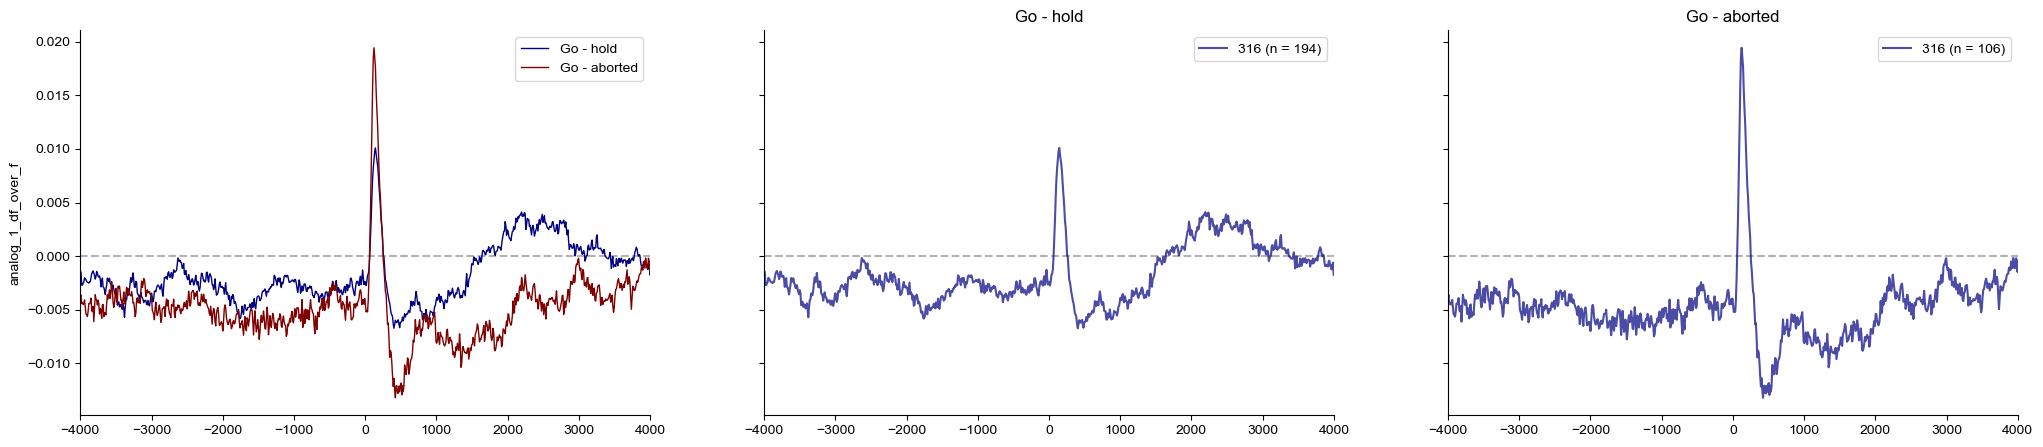

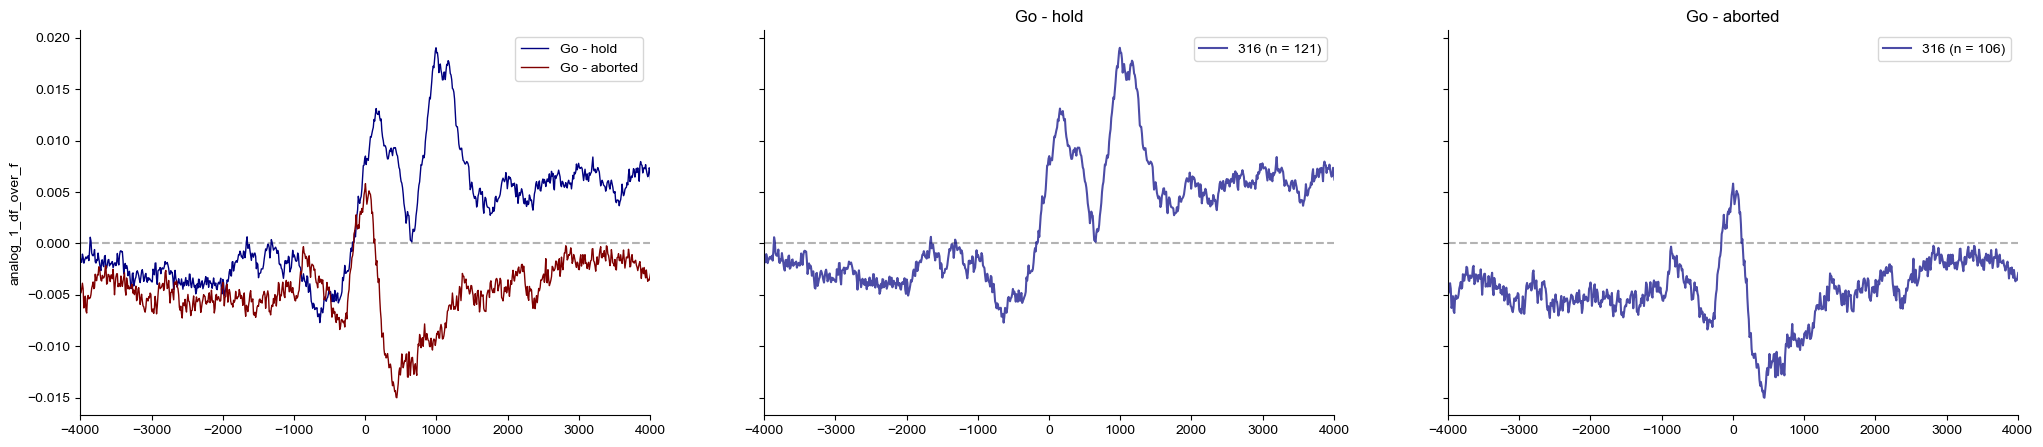

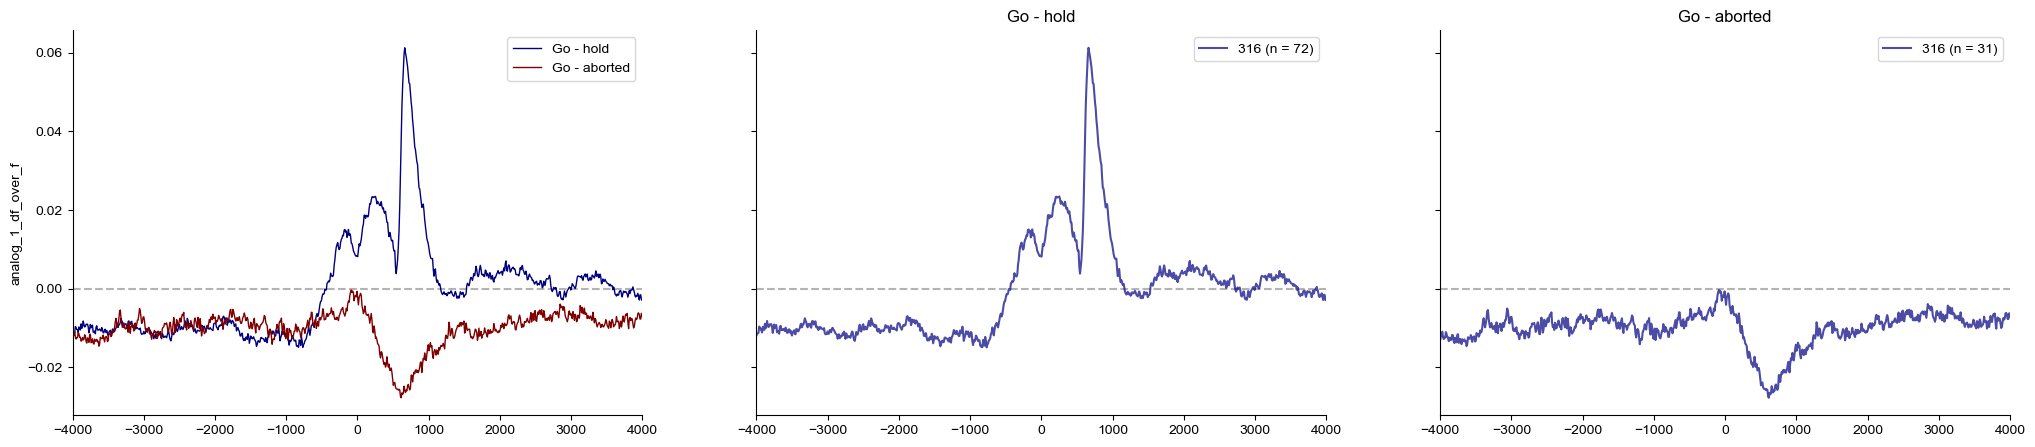

In [ ]:

trigs = [None, 'bar_off','spout']

for trig in trigs:
    cont_dataset = exp_cohort.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = condition_list, 
            cond_aliases = cond_aliases,
            trial_window = trial_window,
            when = 'all', 
            task_names = ['reaching_go_spout_nov22','reaching_go_spout_bar_nov22', 'reaching_go_spout_bar_dual_dec22' ,'reaching_go_spout_bar_dual_all_reward_dec22'],
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            high_pass = None, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1','analog_1_filt','analog_2','analog_2_filt','analog_1_df_over_f'], 
            remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True

    # keep only 316
    cont_dataset.filterout_subjects([0,1,313,314,317,318])
    cont_dataset.filter_lastNsessions(n = 5)
    cont_dataset.lineplot(
        vars = ['analog_1_df_over_f'],
        time_lim = [-4000, 4000],
        # time_unit = 'seconds',
        ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        figsize = (25, 5),
        dpi = 100,
        verbose = True)

In [ ]:

trigs = [None, 'bar_off','spout']
photo_dataset = dict()
for trig in trigs:
    photo_dataset[trig] = exp_cohort.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = condition_list, 
            cond_aliases = cond_aliases,
            trial_window = trial_window,
            when = 'all', 
            task_names = ['reaching_go_spout_nov22','reaching_go_spout_bar_nov22', 'reaching_go_spout_bar_dual_dec22' ,'reaching_go_spout_bar_dual_all_reward_dec22'],
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            high_pass = None, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1','analog_1_filt','analog_2','analog_2_filt','analog_1_df_over_f'], 
            remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True



No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 318 at: 2022-12-08 14:29:10


cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316


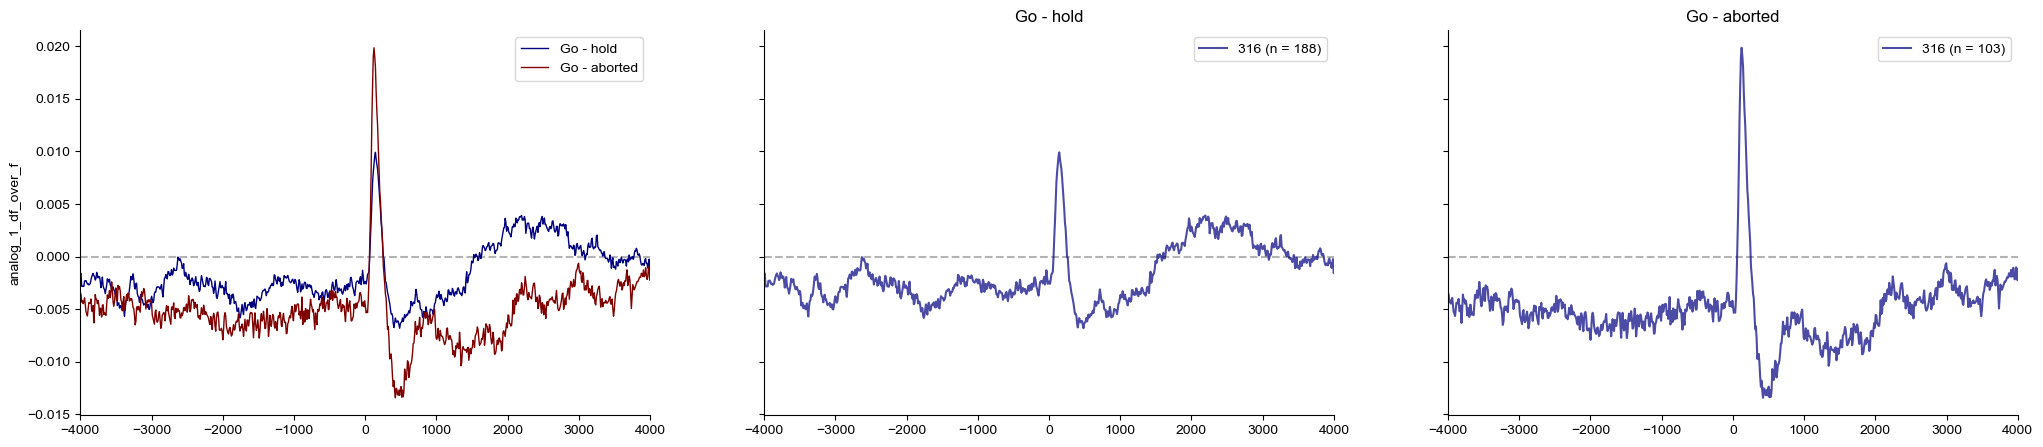

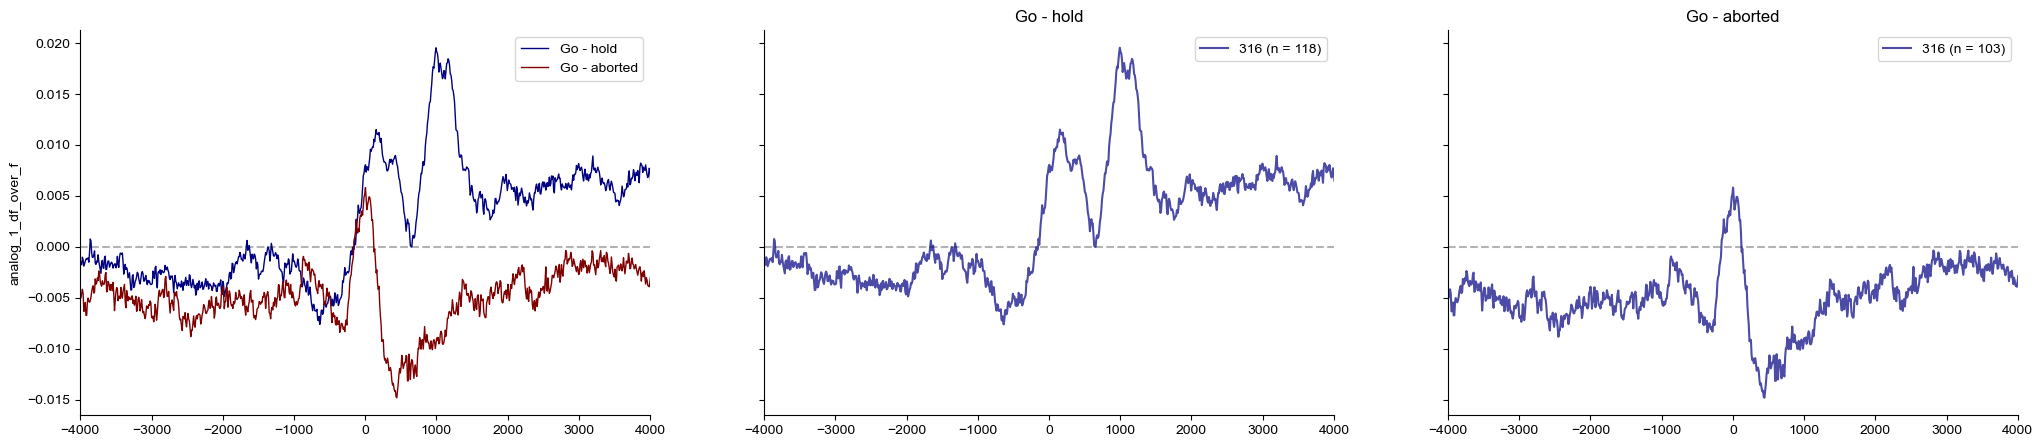

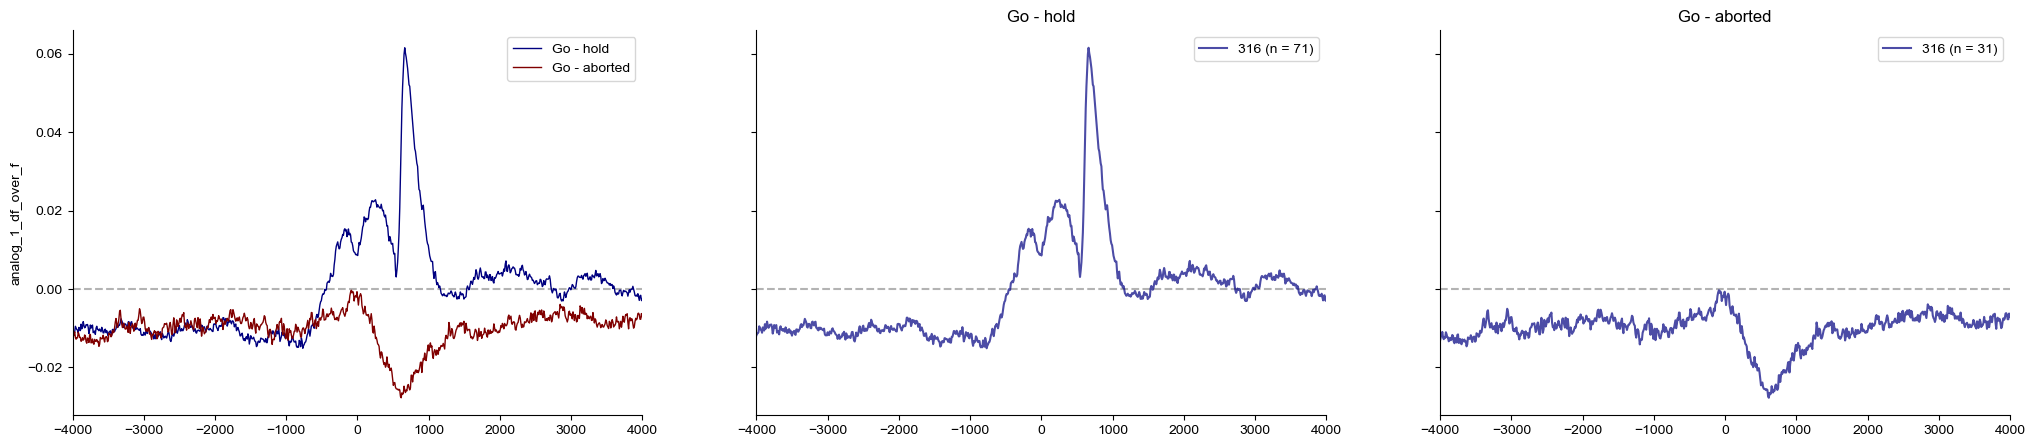

In [ ]:

for trig in trigs:

    # keep only 316
    photo_dataset[trig].filterout_subjects([0,1,313,314,317,318])
    photo_dataset[trig].filter_lastNsessions(n = 5)
    photo_dataset[trig].lineplot(
        vars = ['analog_1_df_over_f'],
        time_lim = [-4000, 4000],
        # time_unit = 'seconds',
        ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        figsize = (25, 5),
        dpi = 100,
        verbose = True)

### Cluster trials to exclude artifacts

c:\Users\phar0732\Anaconda3\envs\trialexp\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Estimated number of clusters: 2
Estimated number of noise points: 37
Silhouette Coefficient: 0.512
samples per cluster:   0    799
 1    126
-1     37
dtype: int64


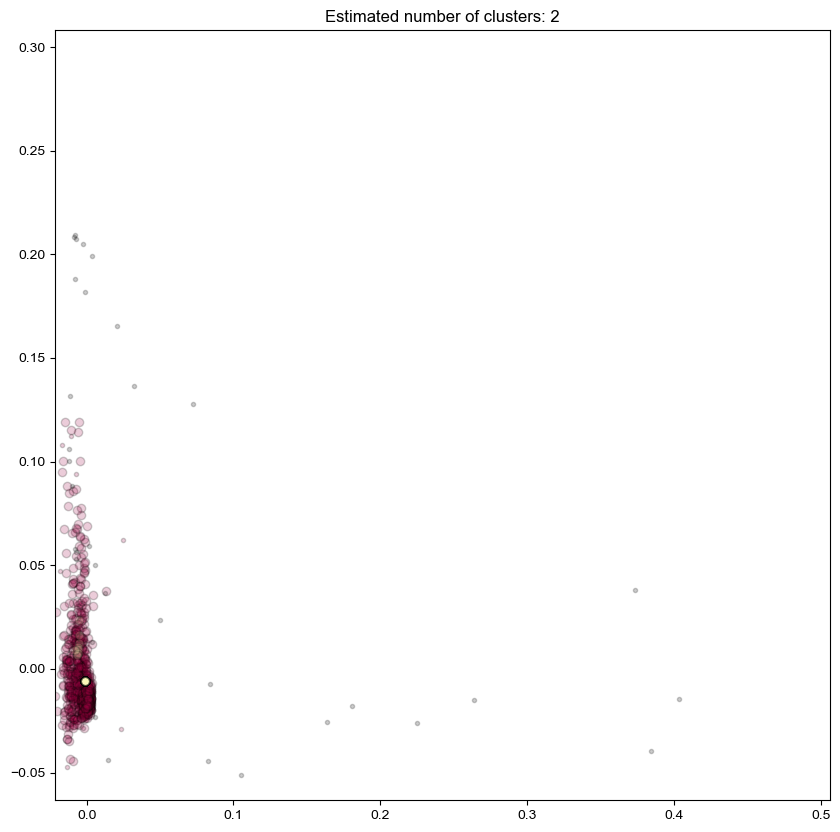

In [ ]:
cont_dataset.cluster_trials(
            vars_to_cluster_on = 'analog_2',  # only work with one var for now.
            dim_reduc_type = 'ICA',
            eps =  0.05,
            min_samples_by_cluster = 5, 
            plot = True,
            plot_lim_pctile = 0.01
            )
        

### Plot the different clusters of trials

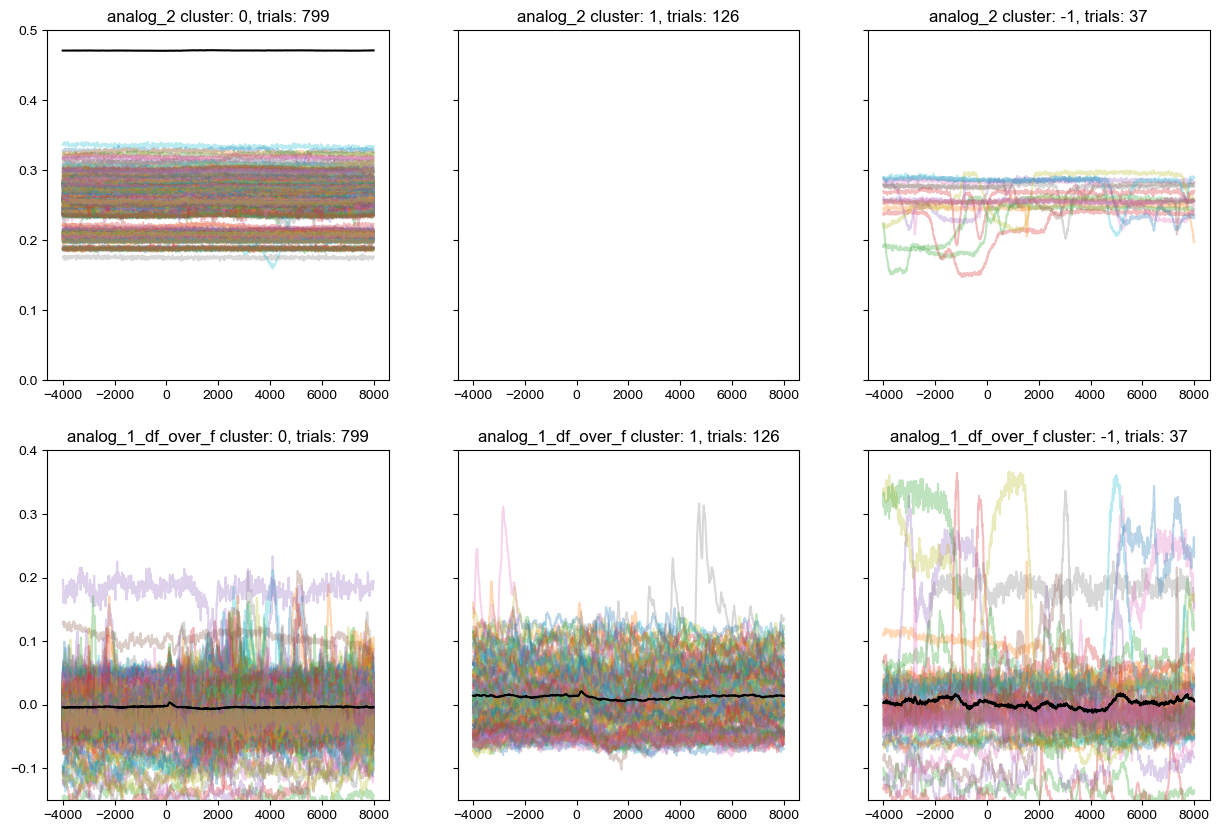

In [ ]:
cont_dataset.plot_clustered_trials(
    vars_to_plot = ['analog_2','analog_1_df_over_f'],
    min_cluster_size_to_plot = 1,
    ylims = [[0,0.5],[-0.15,0.4]],
    figsize = (15,10)
    )

## Inspecting objects attributes and methods

### Experiment object after simple photometry plotting

In [ ]:
object_to_inspect = exp_cohort

object_methods = [method_name for method_name in dir(object_to_inspect)
                  if (callable(getattr(object_to_inspect, method_name)) and ('__' not in method_name))]

object_attributes = [attribute_name for attribute_name in dir(object_to_inspect)
                  if (not callable(getattr(object_to_inspect, attribute_name)) and ('__' not in attribute_name))]

print(f'methods:\n\n{object_methods}, \n\nattributes\n\n{object_attributes}')

methods:

['behav_events_to_dataset', 'check_groups', 'get_deeplabcut_groups', 'get_photometry_groups', 'get_sessions', 'list_vids_to_run_in_dlc', 'match_sessions_to_files', 'plot', 'process_exp_by_trial', 'save', 'sync_photometry_files'], 

attributes

['_sessions', 'by_trial', 'folder_name', 'n_subjects', 'path', 'sessions', 'sessions_per_subject', 'subject_IDs', 'task_names', 'trial_window']


### Session object after simple photometry plotting

In [ ]:
object_to_inspect = exp_cohort.sessions[0]

object_methods = [method_name for method_name in dir(object_to_inspect)
                  if (callable(getattr(object_to_inspect, method_name)) and ('__' not in method_name))]

object_attributes = [attribute_name for attribute_name in dir(object_to_inspect)
                  if (not callable(getattr(object_to_inspect, attribute_name)) and ('__' not in attribute_name))]

print(f'methods:\n\n{object_methods}, \n\nattributes\n\n{object_attributes}')

methods:

['compute_behav_metrics', 'compute_conditions_by_trial', 'compute_success', 'compute_trial_nb', 'create_metadata_dict', 'extract_data_from_session', 'get_analog_trial', 'get_deeplabcut_trials', 'get_photometry_trials', 'get_session_by_trial', 'get_task_specs', 'get_trials_times_from_conditions', 'plot_session', 'plot_trials_events'], 

attributes

['analyzed', 'conditions', 'datetime', 'datetime_string', 'df_conditions', 'df_events', 'events', 'events_to_process', 'experiment_name', 'file_name', 'files', 'metadata_dict', 'number', 'photometry_rsync', 'print_lines', 'setup_ID', 'subject_ID', 'task_name', 'timelim', 'times', 'triggers']
